<h2>Neighborhood clustering

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<b style= 'color: pink'>Import neighborhood data

In [2]:
df_TorontoNeighborhood = pd.read_csv('Toronto_Neighborhoods_with_coordinates.csv')
print('Toronto neighborhoods table imported')
df_TorontoNeighborhood.head()

Toronto neighborhoods table imported


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


<b style="background-color: rgb(255, 236, 139);">Query Toronto coordinates

In [3]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [4]:
# create map of Toronto using latitude and longitude values. If service time out, use (43.653963, -79.387207)
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, postal_code in zip(df_TorontoNeighborhood['Latitude'], df_TorontoNeighborhood['Longitude'], df_TorontoNeighborhood['Borough'], df_TorontoNeighborhood['PostalCode']):
    label = '{}, {}'.format(postal_code, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<b style = 'color: blue'>Explore neighborhoods

In [5]:
#Foursquare query
CLIENT_ID = 'TLCR53MOFEEQI5VHWCREEZYFAUCK4IJDX00GDLZMFGROLB2S' 
CLIENT_SECRET = '54YKMSMH05QBJI0JFB30QW3KE50OHZJXQ3WQTLVMERYV0ARA' 
VERSION = '20190329'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TLCR53MOFEEQI5VHWCREEZYFAUCK4IJDX00GDLZMFGROLB2S
CLIENT_SECRET:54YKMSMH05QBJI0JFB30QW3KE50OHZJXQ3WQTLVMERYV0ARA


In [6]:
def getNearbyVenues(borough, neighborhood_names, latitudes, longitudes, radius = 500, LIMIT = 100):
    
    venues = []
    i = 0
    for bor, neighnames, lat, lng in zip(borough, neighborhood_names, latitudes, longitudes):
        names = [x.strip() for x in neighnames.split(',')]
        for name in names:
            i += 1
            url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},\
            {}&v={}&query={}&radius={}&limit={}'.format\
            (CLIENT_ID, CLIENT_SECRET, lat, lng, 
             VERSION, name, radius, LIMIT)
            results = requests.get(url).json()["response"]['groups'][0]['items']
            print(str(i) + ', ' + bor + ' ' + name + ' ' + str(len(results)) + ' venues found.')
            # return only relevant information for each nearby venue
            j = 0
            for item in results:                
                if item['venue']['name'] and item['venue']['location']['lat'] \
                and item['venue']['location']['lng'] and item['venue']['categories']: 
                    venues.append([
                    name, 
                    lat, 
                    lng, 
                    item['venue']['name'], 
                    item['venue']['location']['lat'], 
                    item['venue']['location']['lng'],  
                    item['venue']['categories'][0]['name']])
                    j += 1 
            print(str(j) + ' venues imported')
    df_venues = pd.DataFrame(venues, columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                                                'Venue','Venue Latitude', 'Venue Longitude', 'Venue Category'])
    return(df_venues)

In [7]:
Toronto_venues = getNearbyVenues(df_TorontoNeighborhood['Borough'], 
                df_TorontoNeighborhood['Neighborhood'], 
                df_TorontoNeighborhood['Latitude'], 
                df_TorontoNeighborhood['Longitude'])

1, Scarborough Rouge 0 venues found.
0 venues imported
2, Scarborough Malvern 0 venues found.
0 venues imported
3, Scarborough Highland Creek 0 venues found.
0 venues imported
4, Scarborough Rouge Hill 0 venues found.
0 venues imported
5, Scarborough Port Union 0 venues found.
0 venues imported
6, Scarborough Guildwood 0 venues found.
0 venues imported
7, Scarborough Morningside 1 venues found.
1 venues imported
8, Scarborough West Hill 1 venues found.
1 venues imported
9, Scarborough Woburn 1 venues found.
1 venues imported
10, Scarborough Cedarbrae 0 venues found.
0 venues imported
11, Scarborough Scarborough Village 0 venues found.
0 venues imported
12, Scarborough East Birchmount Park 0 venues found.
0 venues imported
13, Scarborough Ionview 0 venues found.
0 venues imported
14, Scarborough Kennedy Park 1 venues found.
1 venues imported
15, Scarborough Clairlea 4 venues found.
4 venues imported
16, Scarborough Golden Mile 0 venues found.
0 venues imported
17, Scarborough Oakridge 0

127, Downtown Toronto King and Spadina 0 venues found.
0 venues imported
128, Downtown Toronto Railway Lands 0 venues found.
0 venues imported
129, Downtown Toronto South Niagara 0 venues found.
0 venues imported
130, Downtown Toronto Stn A PO Boxes 25 The Esplanade 8 venues found.
8 venues imported
131, Downtown Toronto First Canadian Place 13 venues found.
13 venues imported
132, Downtown Toronto Underground city 6 venues found.
6 venues imported
133, North York Lawrence Heights 0 venues found.
0 venues imported
134, North York Lawrence Manor 0 venues found.
0 venues imported
135, North York Glencairn 1 venues found.
1 venues imported
136, York Humewood-Cedarvale 0 venues found.
0 venues imported
137, York Caledonia-Fairbanks 2 venues found.
2 venues imported
138, Downtown Toronto Christie 5 venues found.
4 venues imported
139, West Toronto Dovercourt Village 0 venues found.
0 venues imported
140, West Toronto Dufferin 1 venues found.
1 venues imported
141, West Toronto Little Portug

In [8]:
Toronto_venues.shape

(469, 7)

<b style = "color = orange">Observation 1: According to the total number of the found venues that is much less than that of New York City in US, people are less active in using Foursquare to share venues or locations in Toronto despite being big city.

In [10]:
#Save results for further use
Toronto_venues.to_csv('Venues_found_in_Toronto.csv')

<b style = "color:blue; background-color: pink; font-size : 150%">Use venue categories as the features of Toronto neighborhood

In [9]:
# Change the Neighborhood in Venue Category to Neighborhood Area to avoid duplicating the column name in DataFrame
change = {'Neighborhood': 'Neighborhood Area'}
Toronto_venues.replace(change, inplace = True)

# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighborhood,ATM,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Asian Restaurant,Assisted Living,Auto Dealership,Automotive Shop,Baggage Claim,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Belgian Restaurant,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Line,Business Center,Café,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Church,City,Clothing Store,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Library,College Rec Center,College Residence Hall,College Science Building,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Currency Exchange,Dance Studio,Dentist's Office,Department Store,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Event Space,Farmers Market,Fast Food Restaurant,Flight School,Flower Shop,Food Court,Fraternity House,Garden Center,Gastropub,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,High School,Hockey Arena,Hostel,Hotel,Hotel Bar,Indian Restaurant,Intersection,Italian Restaurant,Jazz Club,Jewelry Store,Library,Liquor Store,Massage Studio,Medical Center,Men's Store,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Music Venue,Neighborhood Area,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pharmacy,Pier,Plane,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Real Estate Office,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Student Center,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train,Train Station,University,Vape Store,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wings Joint
0,Morningside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,West Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Woburn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kennedy Park,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Clairlea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Text(0.5, 1.0, 'Toronto neighborhood venue number histogram')

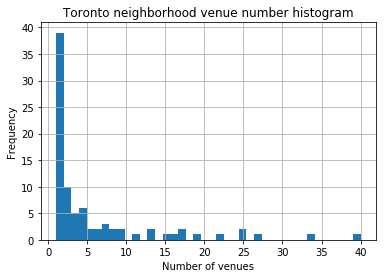

In [10]:
Toronto_venue_count = Toronto_onehot.groupby('Neighborhood').size().reset_index(name='counts')
Toronto_venue_count.set_index('Neighborhood', inplace = True)
Toronto_venue_count.hist(bins = 40)
plt.ylabel('Frequency')
plt.xlabel('Number of venues')
plt.title('Toronto neighborhood venue number histogram')

<b style = "color = Black" >Observation 2: Near half of the neighborhoods only has one recorded venue. It raises concern about using the identical method as clustering Manhattan to cluster Toronto neighborhoods.

<b style = "color: white; background-color: Blue; font-family: Arial">Convert to the frequency of Venue Category occurrence to contiune the exploration

In [48]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.head()

,Neighborhood,ATM,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Asian Restaurant,Assisted Living,Auto Dealership,Automotive Shop,Baggage Claim,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Belgian Restaurant,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Line,Business Center,Café,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Church,City,Clothing Store,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Library,College Rec Center,College Residence Hall,College Science Building,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Currency Exchange,Dance Studio,Dentist's Office,Department Store,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Event Space,Farmers Market,Fast Food Restaurant,Flight School,Flower Shop,Food Court,Fraternity House,Garden Center,Gastropub,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,High School,Hockey Arena,Hostel,Hotel,Hotel Bar,Indian Restaurant,Intersection,Italian Restaurant,Jazz Club,Jewelry Store,Library,Liquor Store,Massage Studio,Medical Center,Men's Store,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Music Venue,Neighborhood Area,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pharmacy,Pier,Plane,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Real Estate Office,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Student Center,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train,Train Station,University,Vape Store,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wings Joint
0,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.04,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.04,0.0,0.04,0.0,0.0,0.0,0.00,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0.0,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.04,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0

In [45]:
Toronto_grouped.shape

(85, 165)

<b style = "color: Green" > Examine the top 5 occurrence of each Neighborhood

In [13]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide----
                  venue  freq
0                Office  0.28
1              Building  0.08
2  Gym / Fitness Center  0.04
3                   Pub  0.04
4  Brazilian Restaurant  0.04


----Agincourt----
             venue  freq
0  Auto Dealership   1.0
1              ATM   0.0
2            Motel   0.0
3    Movie Theater   0.0
4      Music Venue   0.0


----Alderwood----
               venue  freq
0               Pool  0.25
1  Neighborhood Area  0.25
2   Dentist's Office  0.25
3            Library  0.25
4                ATM  0.00


----Berczy Park----
           venue  freq
0           Park   1.0
1            ATM   0.0
2   Optical Shop   0.0
3          Motel   0.0
4  Movie Theater   0.0


----Birch Cliff----
                 venue  freq
0       Student Center   1.0
1                  ATM   0.0
2               Office   0.0
3  Monument / Landmark   0.0
4                Motel   0.0


----Business Reply Mail Processing Centre 969 Eastern----
                  venue  freq
0    

                 venue  freq
0        Shopping Mall  0.11
1  Sporting Goods Shop  0.11
2           Sports Bar  0.11
3          Coffee Shop  0.11
4       Massage Studio  0.11


----Little Portugal----
               venue  freq
0  Neighborhood Area   0.5
1             Bakery   0.5
2                ATM   0.0
3       Optical Shop   0.0
4              Motel   0.0


----Maple Leaf Park----
           venue  freq
0           Park   1.0
1            ATM   0.0
2   Optical Shop   0.0
3          Motel   0.0
4  Movie Theater   0.0


----Moore Park----
                 venue  freq
0           Playground   0.5
1         Tennis Court   0.5
2               Office   0.0
3  Monument / Landmark   0.0
4                Motel   0.0


----Morningside----
               venue  freq
0               Road   1.0
1  Mobile Phone Shop   0.0
2              Motel   0.0
3      Movie Theater   0.0
4        Music Venue   0.0


----New Toronto----
           venue  freq
0     Restaurant   1.0
1            ATM   0.0
2   

<b >This confirms that the inactive usage of Foursquare in Toronto

<h2 style = "color: red">Clustering by the Manhattan method demonstrated in the course

In [153]:
# set number of clusters
kclusters = 2

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

<b style = "color: Red"> Use the most common venues as features to examine the clustering result

In [154]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [155]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Office,Building,Gym,Dentist's Office,Brazilian Restaurant,Medical Center,Music Venue,Pub,Poutine Place,Intersection
1,Agincourt,Auto Dealership,Wings Joint,Currency Exchange,Dog Run,Doctor's Office,Diner,Dim Sum Restaurant,Department Store,Dentist's Office,Dance Studio
2,Alderwood,Pool,Dentist's Office,Library,Neighborhood Area,Wings Joint,Cosmetics Shop,Dim Sum Restaurant,Department Store,Dance Studio,Currency Exchange
3,Berczy Park,Park,Wings Joint,Cosmetics Shop,Diner,Dim Sum Restaurant,Department Store,Dentist's Office,Dance Studio,Currency Exchange,Coworking Space
4,Birch Cliff,Student Center,Wings Joint,Coworking Space,Doctor's Office,Diner,Dim Sum Restaurant,Department Store,Dentist's Office,Dance Studio,Currency Exchange


<b style = "color: black">Observation 3: Using the same method to present the N most common venues of the Toronto neighborhoods is misleading to some extent, because it automatically places some unexisting venues into the fields.

In [157]:
#Combine information to yield a more reasonable DataFrame.
for i in range(neighborhoods_venues_sorted.shape[0] - 1):
    for j in range(num_top_venues):
        if not(Toronto_grouped.loc[i, neighborhoods_venues_sorted.iloc[i,j + 1]]):
            neighborhoods_venues_sorted.iloc[i,j + 1] = 'NA'
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Office,Building,Gym,Dentist's Office,Brazilian Restaurant,Medical Center,Music Venue,Pub,Poutine Place,Intersection
1,Agincourt,Auto Dealership,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Alderwood,Pool,Dentist's Office,Library,Neighborhood Area,NA,NA,NA,NA,NA,NA
3,Berczy Park,Park,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Birch Cliff,Student Center,NA,NA,NA,NA,NA,NA,NA,NA,NA


<b style = "color: black">Observation 4: This DataFrame presents the information more accurately.

<b style = "color: black ">Combine necessary information about the neighborhood clustering and plot

In [148]:
def ReorderNeighborhood(borough, neighborhood_names, latitudes, longitudes):
    
    neighborhood = []
    for bor, neighnames, lat, lng in zip(borough, neighborhood_names, latitudes, longitudes):
        names = [x.strip() for x in neighnames.split(',')]
        for name in names:
            neighborhood.append([bor, name, lat, lng])
                    
    df_neighborhood = pd.DataFrame(neighborhood, columns = ['Borough', 'Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude'])
    return(df_neighborhood)

In [138]:
Toronto_neighborhood_data = ReorderNeighborhood(df_TorontoNeighborhood['Borough'], 
                df_TorontoNeighborhood['Neighborhood'], 
                df_TorontoNeighborhood['Latitude'], 
                df_TorontoNeighborhood['Longitude'])
Toronto_neighborhood_data.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Scarborough,Rouge,43.806686,-79.194353
1,Scarborough,Malvern,43.806686,-79.194353
2,Scarborough,Highland Creek,43.784535,-79.160497
3,Scarborough,Rouge Hill,43.784535,-79.160497
4,Scarborough,Port Union,43.784535,-79.160497


In [158]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted = neighborhoods_venues_sorted.join(Toronto_neighborhood_data.set_index('Neighborhood'), on='Neighborhood')
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighborhoods_venues_sorted.head() # check the last columns!

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Neighborhood Latitude,Neighborhood Longitude
0,0,Adelaide,Office,Building,Gym,Dentist's Office,Brazilian Restaurant,Medical Center,Music Venue,Pub,Poutine Place,Intersection,Downtown Toronto,43.650571,-79.384568
1,0,Agincourt,Auto Dealership,NA,NA,NA,NA,NA,NA,NA,NA,NA,Scarborough,43.794200,-79.262029
2,0,Alderwood,Pool,Dentist's Office,Library,Neighborhood Area,NA,NA,NA,NA,NA,NA,Etobicoke,43.602414,-79.543484
3,0,Berczy Park,Park,NA,NA,NA,NA,NA,NA,NA,NA,NA,Downtown Toronto,43.644771,-79.373306
4,0,Birch Cliff,Student Center,NA,NA,NA,NA,NA,NA,NA,NA,NA,Scarborough,43.692657,-79.264848


In [160]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 1, 
                    neighborhoods_venues_sorted.columns[[1] + list(range(2, neighborhoods_venues_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Neighborhood Latitude,Neighborhood Longitude
9,Caledonia-Fairbanks,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,NA,York,43.689026,-79.453512
28,Garden District,Spa,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,Downtown Toronto,43.657162,-79.378937
33,Humber Bay,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,NA,Etobicoke,43.636258,-79.498509
34,Humber Summit,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,NA,North York,43.756303,-79.565963
35,Humberlea,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,NA,North York,43.724766,-79.532242
45,Little Portugal,Bakery,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,West Toronto,43.647927,-79.419750
54,Richview Gardens,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,NA,Etobicoke,43.688905,-79.554724
60,Silverthorn,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,NA,York,43.691116,-79.476013
62,St. James Town,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,NA,Downtown Toronto,43.667967,-79.367675
62,St. James Town,Neighborhood Area,NA,NA,NA,NA,NA,NA,NA,NA,NA,Downtown Toronto,43.651494,-79.375418


In [98]:
# create map
map_clusters = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], 
                                  neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b style = "color: black">Observation 5: The clustering result depends on the number of clusters. Increasing the number from 2 to 10, the accuracy of the clustering by the K mean method improves, particularly for those neighborhoods has merely a few venues. However, For those neighborhoods have more venues, it looks inaccurate because this method clusters them into one cluster.

<h2 style = "color: blue">Try an alternative method

<b style = "color : black">Accordind to Observation 2, the neighborhoods are first separated into Active zones and inactive zones by the number of their found venues with a threshold of 5.

In [163]:
Active_zones = Toronto_venue_count.loc[Toronto_venue_count['counts'] > 5]
Inactive_zones = Toronto_venue_count.loc[Toronto_venue_count['counts'] <= 5]

In [164]:
Active_grouped = Toronto_grouped.loc[Toronto_grouped['Neighborhood'].isin(Active_zones.index.tolist())]
Inactive_grouped = Toronto_grouped.loc[Toronto_grouped['Neighborhood'].isin(Inactive_zones.index.tolist())]

<b>Use the 5 most common venues to examine later

In [219]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [232]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Active_group_sorted = pd.DataFrame(columns=columns)
Active_group_sorted['Neighborhood'] = Active_grouped['Neighborhood']
Inactive_group_sorted = pd.DataFrame(columns=columns)
Inactive_group_sorted['Neighborhood'] = Inactive_grouped['Neighborhood']

for ind in np.arange(Active_grouped.shape[0]):
    Active_group_sorted.iloc[ind, 1:] = return_most_common_venues(Active_grouped.iloc[ind, :], num_top_venues)

for ind in np.arange(Inactive_grouped.shape[0]):
    Inactive_group_sorted.iloc[ind, 1:] = return_most_common_venues(Inactive_grouped.iloc[ind, :], num_top_venues)


for i in np.arange(Inactive_grouped.shape[0]):
    for j in range(num_top_venues):
        if not(Inactive_grouped.iloc[i][Inactive_group_sorted.iloc[i,j + 1]]):
            Inactive_group_sorted.iloc[i,j + 1] = 'NA'
Inactive_group_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Agincourt,Auto Dealership,NA,NA,NA,NA
2,Alderwood,Pool,Dentist's Office,Library,Neighborhood Area,NA
3,Berczy Park,Park,NA,NA,NA,NA
4,Birch Cliff,Student Center,NA,NA,NA,NA
5,Business Reply Mail Processing Centre 969 Eastern,Garden Center,NA,NA,NA,NA


In [231]:
#Clustering for Active group
kclusters = 5
Active_grouped_clustering = Active_grouped.drop('Neighborhood', 1)
kmeans_active = KMeans(n_clusters=kclusters, random_state=0).fit(Active_grouped_clustering)
kmeans_active.labels_[0:10]

#Clustering for Inactive group
kclusters = 10
Inactive_grouped_clustering = Inactive_grouped.drop('Neighborhood', 1)
kmeans_inactive = KMeans(n_clusters=kclusters, random_state=0).fit(Inactive_grouped_clustering)
kmeans_inactive.labels_[0:10]

array([5, 2, 9, 2, 2, 0, 2, 3, 2, 2], dtype=int32)

In [222]:
Active_group_sorted.insert(0, 'Cluster Labels', kmeans_active.labels_)
Active_group_sorted = Active_group_sorted.join(Toronto_neighborhood_data.set_index('Neighborhood'), on='Neighborhood')
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Active_group_sorted.head() # check the last columns!

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Neighborhood Latitude,Neighborhood Longitude
0,0,Adelaide,Office,Building,Gym,Dentist's Office,Brazilian Restaurant,Downtown Toronto,43.650571,-79.384568
8,1,Cabbagetown,Café,Gourmet Shop,Italian Restaurant,Bakery,Neighborhood Area,Downtown Toronto,43.667967,-79.367675
11,0,Central Bay Street,Government Building,Building,Portuguese Restaurant,Office,Neighborhood Area,Downtown Toronto,43.657952,-79.387383
12,1,Chinatown,Chinese Restaurant,Dim Sum Restaurant,Coffee Shop,Vietnamese Restaurant,Shopping Mall,Downtown Toronto,43.653206,-79.400049
16,0,Commerce Court,Office,Gym,American Restaurant,Sandwich Place,Building,Downtown Toronto,43.648198,-79.379817


In [233]:
Inactive_group_sorted.insert(0, 'Cluster Labels', kmeans_inactive.labels_)
Inactive_group_sorted = Inactive_group_sorted.join(Toronto_neighborhood_data.set_index('Neighborhood'), on='Neighborhood')
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Inactive_group_sorted.head() # check the last columns!

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Neighborhood Latitude,Neighborhood Longitude
1,5,Agincourt,Auto Dealership,NA,NA,NA,NA,Scarborough,43.794200,-79.262029
2,2,Alderwood,Pool,Dentist's Office,Library,Neighborhood Area,NA,Etobicoke,43.602414,-79.543484
3,9,Berczy Park,Park,NA,NA,NA,NA,Downtown Toronto,43.644771,-79.373306
4,2,Birch Cliff,Student Center,NA,NA,NA,NA,Scarborough,43.692657,-79.264848
5,2,Business Reply Mail Processing Centre 969 Eastern,Garden Center,NA,NA,NA,NA,East Toronto,43.662744,-79.321558


In [182]:
# create map
map_clusters2 = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Inactive_group_sorted['Neighborhood Latitude'], Inactive_group_sorted['Neighborhood Longitude'], 
                                  Inactive_group_sorted['Neighborhood'], Inactive_group_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

In [245]:
Inactive_group_sorted.loc[Inactive_group_sorted['Cluster Labels'] == 2, 
                    Inactive_group_sorted.columns[[1] + list(range(2, Inactive_group_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Neighborhood Latitude,Neighborhood Longitude
2,Alderwood,Pool,Dentist's Office,Library,Neighborhood Area,NA,Etobicoke,43.602414,-79.543484
4,Birch Cliff,Student Center,NA,NA,NA,NA,Scarborough,43.692657,-79.264848
5,Business Reply Mail Processing Centre 969 Eastern,Garden Center,NA,NA,NA,NA,East Toronto,43.662744,-79.321558
7,CN Tower,Harbor / Marina,NA,NA,NA,NA,Downtown Toronto,43.628947,-79.394420
10,Canada Post Gateway Processing Centre,Government Building,NA,NA,NA,NA,Mississauga,43.636966,-79.615819
13,Christie,Café,Baseball Field,Coffee Shop,Neighborhood Area,NA,Downtown Toronto,43.669542,-79.422564
14,Church and Wellesley,Parking,Intersection,NA,NA,NA,Downtown Toronto,43.665860,-79.383160
17,Davisville,Skating Rink,Tennis Court,Veterinarian,Diner,Building,Central Toronto,43.704324,-79.388790
18,Deer Park,Building,NA,NA,NA,NA,Central Toronto,43.686412,-79.400049
19,Design Exchange,Art Gallery,Café,NA,NA,NA,Downtown Toronto,43.647177,-79.381576


<b>Observation 6: With incrasing the number of the clusters, the accuracy of clustering improves, presenting similar phenonemon as the non-separate method in the previous section. However, for those neighborhoods with scattered features, this method still has difficulty to sort them out. 

In [206]:
Active_group_sorted.loc[Active_group_sorted['Cluster Labels'] == 4, 
                    Active_group_sorted.columns[[1] + list(range(2, Active_group_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Neighborhood Latitude,Neighborhood Longitude
74,Underground city,Monument / Landmark,Parking,City,Dance Studio,Wings Joint,Downtown Toronto,43.648429,-79.38228


<b>Observation 7: According to the result above, the K mean method produces less reasonable clustering for Active group, because the data of Active group is less sufficient and the available features of Active group is even more scattered.